# **Import all required Libraries**

In [1]:
import os
import imageio.v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import tensorflow as tf
from tensorflow import keras
from scipy import misc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

# Load the dataset and define paths for training and testing

In [2]:
path_train = '/content/drive/MyDrive/Brain_tumor/archive/Training/'
path_test = '/content/drive/MyDrive/Brain_tumor/archive/Testing'

# initialize lists to store the image data, paths, and labels
data = []
y = []

# loop through the directories and files in the training data path
for r, d, f in os.walk(path_train):
    for file in f:
        if '.jpg' in file:
            
            path = os.path.join(r, file)
            
            if 'glioma_tumor' in r:
                y.append(3)
            elif 'meningioma_tumor' in r:
                y.append(2)
            elif 'pituitary_tumor' in r:
                y.append(1)
            elif 'no_tumor' in r:
                y.append(0)
            # load the image using PIL, resize it to 128x128, and append it to the data list
            img = Image.open(path)
            img = img.resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128, 3):
                data.append(np.array(img))

# loop through the directories and files in the testing data path
for r, d, f in os.walk(path_test):
    for file in f:
        if '.jpg' in file:
            # if the file is an image file, append its path to the paths_test list
            path = os.path.join(r, file)
            # use the parent directory to determine the label for the image and append it to the y list
            if 'glioma_tumor' in r:
                y.append(3)
            elif 'meningioma_tumor' in r:
                y.append(2)
            elif 'pituitary_tumor' in r:
                y.append(1)
            elif 'no_tumor' in r:
                y.append(0)
            # load the image using PIL, resize it to 128x128, and append it to the data list
            img = Image.open(path)
            img = img.resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128, 3):
                data.append(np.array(img))


In [3]:
# convert y and data to a numpy array and also y to one-hot encode the labels
data = np.array(data)
y = np.array(y)
y = np_utils.to_categorical(y)
print(data.shape)
print(y.shape)

(3264, 128, 128, 3)
(3264, 4)


In [4]:
data= data.astype('float32')
data/=255

AxesImage(54,36;334.8x217.44)


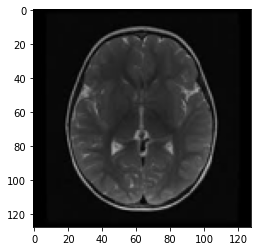

In [5]:
#To check the data

print(plt.imshow(data[233]))

# Splitting data to train and test

In [6]:
# Split the data into train and test sets
X_train, X_test,y_train, y_test= train_test_split(data, y, test_size= 0.2 , shuffle = True, random_state = 42)

# Defining the model

In [7]:

model = Sequential()

# Adding first Conv2D layer with 32 filters and 2x2 kernel size and 'same' padding
model.add(Conv2D(32, (2, 2), padding='same', input_shape=(128,128,3)))
model.add(Activation('relu'))

# Adding second Conv2D layer with 32 filters and 3x3 kernel size
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))

# Adding Max Pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding Dropout layer with 25% dropout rate
model.add(Dropout(0.2))

# Adding third Conv2D layer with 64 filters and 3x3 kernel size and 'same' padding
model.add(Conv2D(128, (2, 2), padding='same'))
model.add(Activation('relu'))

# Adding fourth Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# Adding Max Pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding Dropout layer with 25% dropout rate
model.add(Dropout(0.25))

# Flattening the output from the previous layer
model.add(Flatten())

# Adding a dense layer with 128 neurons
model.add(Dense(128))
model.add(Activation('relu'))

# Adding another dropout layer with 50% dropout rate
model.add(Dropout(0.5))

# Adding a dense layer with 64 neurons
model.add(Dense(64))
model.add(Activation('relu'))

# Adding the output layer with 4 neurons and softmax activation
model.add(Dense(4, Activation('softmax')))


2023-02-15 10:43:03.379080: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-15 10:43:03.468108: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-15 10:43:03.468881: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-15 10:43:03.470079: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 127, 32)      4128      
_________________________________________________________________
activation_1 (Activation)    (None, 127, 127, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 128)       1

 # Compile the model

In [9]:
opt = Adam(learning_rate=0.0001) # Set the learning rate to 0.0001
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model and save the history
history = model.fit(X_train, y_train, batch_size=50, epochs=15, validation_data=(X_test, y_test), verbose=1)


2023-02-15 10:43:07.208220: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2023-02-15 10:43:08.760934: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


53/53 [==============================] - 10s 49ms/step - loss: 1.2739 - accuracy: 0.4182 - val_loss: 1.1845 - val_accuracy: 0.4946
Epoch 2/15
53/53 [==============================] - 2s 38ms/step - loss: 1.1411 - accuracy: 0.4944 - val_loss: 1.0888 - val_accuracy: 0.6248
Epoch 3/15
53/53 [==============================] - 2s 37ms/step - loss: 1.0060 - accuracy: 0.5703 - val_loss: 0.9470 - val_accuracy: 0.6156
Epoch 4/15
53/53 [==============================] - 2s 37ms/step - loss: 0.9148 - accuracy: 0.6063 - val_loss: 0.8748 - val_accuracy: 0.6478
Epoch 5/15
53/53 [==============================] - 2s 37ms/step - loss: 0.8346 - accuracy: 0.6538 - val_loss: 0.8403 - val_accuracy: 0.6662
Epoch 6/15
53/53 [==============================] - 2s 37ms/step - loss: 0.7759 - accuracy: 0.6733 - val_loss: 0.7511 - val_accuracy: 0.6968
Epoch 7/15
53/53 [==============================] - 2s 38ms/step - loss: 0.7046 - accuracy: 0.6982 - val_loss: 0.7035 - val_accuracy: 0.7090
Epoch 8/15
53/53 [=====

# Evaluation

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


21/21 [==============================] - 0s 13ms/step - loss: 0.5148 - accuracy: 0.8147
Test loss: 0.5147616267204285
Test accuracy: 0.8147013783454895


# Graph plot

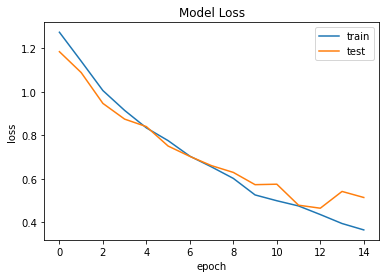

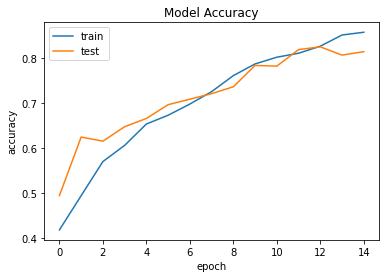

In [11]:
# Plot the training history for both loss and accuracy
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
